In [1]:
#import libs

import pandas as pd
pd.set_option('display.max_columns', None)

#import libs

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
df= catalog.load('election_databse')
df

2022-06-30 23:13:12,356 - kedro.io.data_catalog - INFO - Loading data from `election_databse` (CSVDataSet)...


,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,2.30,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,2.30,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,2.30,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,2.30,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,2.30,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,2.08,51.04,348061,177647,4235,2.22,3632,1.90,51.28,371931,190712,NC,0,0.19,0.20,332,0,0
21639,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,2.08,51.04,348061,177647,4235,2.22,3632,1.90,51.28,371931,190712,PNR,0,0.18,0.19,326,0,0
21640,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,2.08,51.04,348061,177647,4235,2.22,3632,1.90,51.28,371931,190712,MPT,0,0.14,0.15,256,0,0
21641,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,2.08,51.04,348061,177647,4235,2.22,3632,1.90,51.28,371931,190712,PTP,0,0.13,0.14,239,0,0


In [3]:
df_lisboa = df.loc[df['territoryName'] == 'Lisboa']
df_lisboa.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
213,0,2019-10-06 20:10:02,Lisboa,0,48,134,6,127,2.78,114,2.49,55.33,8265,4573,119,2.43,104,2.12,58.24,8414,4900,PS,0,34.64,36.57,1584,20,20
214,0,2019-10-06 20:10:02,Lisboa,0,48,134,6,127,2.78,114,2.49,55.33,8265,4573,119,2.43,104,2.12,58.24,8414,4900,PPD/PSD,0,29.19,30.82,1335,17,12
215,0,2019-10-06 20:10:02,Lisboa,0,48,134,6,127,2.78,114,2.49,55.33,8265,4573,119,2.43,104,2.12,58.24,8414,4900,B.E.,0,7.78,8.22,356,4,5
216,0,2019-10-06 20:10:02,Lisboa,0,48,134,6,127,2.78,114,2.49,55.33,8265,4573,119,2.43,104,2.12,58.24,8414,4900,PCP-PEV,0,5.69,6.00,260,3,4
217,0,2019-10-06 20:10:02,Lisboa,0,48,134,6,127,2.78,114,2.49,55.33,8265,4573,119,2.43,104,2.12,58.24,8414,4900,CDS-PP,0,5.49,5.79,251,3,2


In [4]:
def df_lisboa(df):
    
    """ Essa funcao serve para limitar o dataset apenas para o Territorio = Lisboa """
    
    df = df.loc[df['territoryName'] == 'Lisboa']
    return df

In [5]:
#Testando a funcao df_lisboa

df_lisboa = df_lisboa(catalog.load('election_databse'))
df_lisboa.head()

2022-06-30 23:13:12,455 - kedro.io.data_catalog - INFO - Loading data from `election_databse` (CSVDataSet)...


,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
213,0,2019-10-06 20:10:02,Lisboa,0,48,134,6,127,2.78,114,2.49,55.33,8265,4573,119,2.43,104,2.12,58.24,8414,4900,PS,0,34.64,36.57,1584,20,20
214,0,2019-10-06 20:10:02,Lisboa,0,48,134,6,127,2.78,114,2.49,55.33,8265,4573,119,2.43,104,2.12,58.24,8414,4900,PPD/PSD,0,29.19,30.82,1335,17,12
215,0,2019-10-06 20:10:02,Lisboa,0,48,134,6,127,2.78,114,2.49,55.33,8265,4573,119,2.43,104,2.12,58.24,8414,4900,B.E.,0,7.78,8.22,356,4,5
216,0,2019-10-06 20:10:02,Lisboa,0,48,134,6,127,2.78,114,2.49,55.33,8265,4573,119,2.43,104,2.12,58.24,8414,4900,PCP-PEV,0,5.69,6.00,260,3,4
217,0,2019-10-06 20:10:02,Lisboa,0,48,134,6,127,2.78,114,2.49,55.33,8265,4573,119,2.43,104,2.12,58.24,8414,4900,CDS-PP,0,5.49,5.79,251,3,2


In [6]:
#limpar os dados e verificar se tem algum NaN
nan_df = df_lisboa[df_lisboa.isna().any(axis=1)]
nan_df.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates


In [7]:
df_lisboa.isnull().sum()

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

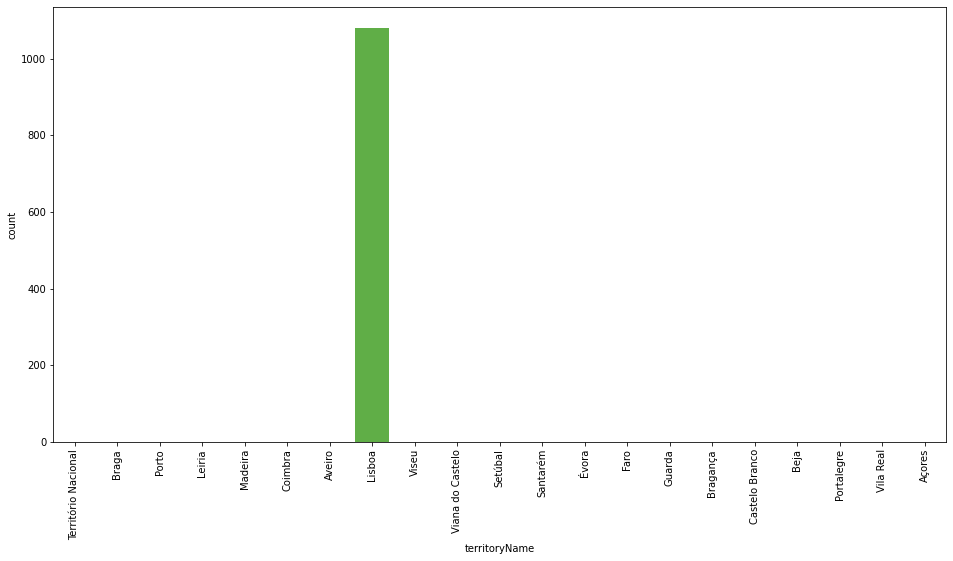

In [8]:
#Avaliando o Nome de territorio
f, ax = plt.subplots(figsize=(16,8))
territory_plot = sns.countplot(x='territoryName', data=df_lisboa, order = df['territoryName'].value_counts().index)
territory_plot.set_xticklabels(territory_plot.get_xticklabels(), rotation=90)
fig = territory_plot.get_figure()
fig.savefig("fig_territory.png") 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


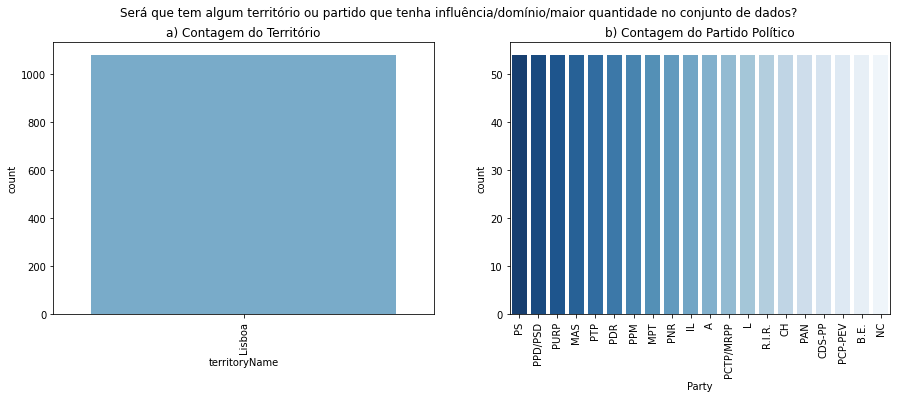

In [9]:
# Qual o territorio e o partido que tem mais frequencia nos dados? 
# Será que tem algum territorio ou partido que tenha dominancia no conjunto de dados? 

fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Será que tem algum território ou partido que tenha influência/domínio/maior quantidade no conjunto de dados?')

axes[0].set_title('a) Contagem do Território')
territory = sns.countplot(df_lisboa['territoryName'], data=df_lisboa, ax=axes[0], order = df_lisboa['territoryName'].value_counts().index, palette = "Blues_r")
axes[0].set_xticklabels(territory.get_xticklabels(), rotation=90)

axes[1].set_title('b) Contagem do Partido Político')
party = sns.countplot(df_lisboa['Party'],data=df_lisboa, ax=axes[1], order = df_lisboa['Party'].value_counts().index, palette = "Blues_r")
axes[1].set_xticklabels(party.get_xticklabels(), rotation=90)

plt.show()

In [10]:
corr_all = df_lisboa.corr()
corr_all
corr_all.style.background_gradient(cmap='Reds')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/io/formats/style.py:3554: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/io/formats/style.py:3555: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
TimeElapsed,1.000000,0.952592,-0.952592,nan,0.967750,0.973402,-0.883474,0.972068,-0.866133,0.441349,0.970633,0.971714,0.972989,-0.911864,0.971543,-0.843903,0.659509,0.970917,0.971578,0.295401,0.003346,0.000024,0.313488,-0.000000,-0.000000
totalMandates,0.952592,1.000000,-1.000000,nan,0.903611,0.970654,-0.848788,0.973383,-0.709155,0.199243,0.977612,0.977728,0.974153,-0.826060,0.976218,-0.676591,0.439159,0.977606,0.977751,0.310102,0.002946,0.000027,0.315514,-0.000000,-0.000000
availableMandates,-0.952592,-1.000000,1.000000,nan,-0.903611,-0.970654,0.848788,-0.973383,0.709155,-0.199243,-0.977612,-0.977728,-0.974153,0.826060,-0.976218,0.676591,-0.439159,-0.977606,-0.977751,-0.310102,-0.002946,-0.000027,-0.315514,0.000000,0.000000
numParishes,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
numParishesApproved,0.967750,0.903611,-0.903611,nan,1.000000,0.974944,-0.925368,0.971703,-0.927045,0.479818,0.966591,0.967159,0.971612,-0.966388,0.968609,-0.909307,0.712862,0.966794,0.967060,0.280212,0.003554,0.000022,0.311954,-0.000000,-0.000000
blankVotes,0.973402,0.970654,-0.970654,nan,0.974944,1.000000,-0.922142,0.999844,-0.829346,0.319479,0.999304,0.999379,0.999867,-0.923622,0.999562,-0.802826,0.569729,0.999319,0.999354,0.301002,0.003335,0.000026,0.322421,-0.000000,-0.000000
blankVotesPercentage,-0.883474,-0.848788,0.848788,nan,-0.925368,-0.922142,1.000000,-0.918008,0.840422,-0.409240,-0.914809,-0.915687,-0.919029,0.974304,-0.915352,0.820745,-0.637236,-0.915035,-0.915565,-0.263211,-0.003495,-0.000025,-0.295369,0.000000,0.000000
nullVotes,0.972068,0.973383,-0.973383,nan,0.971703,0.999844,-0.918008,1.000000,-0.821308,0.307215,0.999747,0.999755,0.999951,-0.917789,0.999906,-0.794225,0.558205,0.999750,0.999744,0.301848,0.003310,0.000026,0.322547,-0.000000,-0.000000
nullVotesPercentage,-0.866133,-0.709155,0.709155,nan,-0.927045,-0.829346,0.840422,-0.821308,1.000000,-0.757625,-0.809935,-0.811659,-0.821683,0.935493,-0.814484,0.998256,-0.914232,-0.810427,-0.811291,-0.219911,-0.003572,-0.000016,-0.261690,0.000000,0.000000
votersPercentage,0.441349,0.199243,-0.199243,nan,0.479818,0.319479,-0.409240,0.307215,-0.757625,1.000000,0.291606,0.295794,0.309379,-0.546247,0.298650,-0.778940,0.954137,0.292539,0.294957,0.061786,0.002325,0.000004,0.095206,0.000000,0.000000


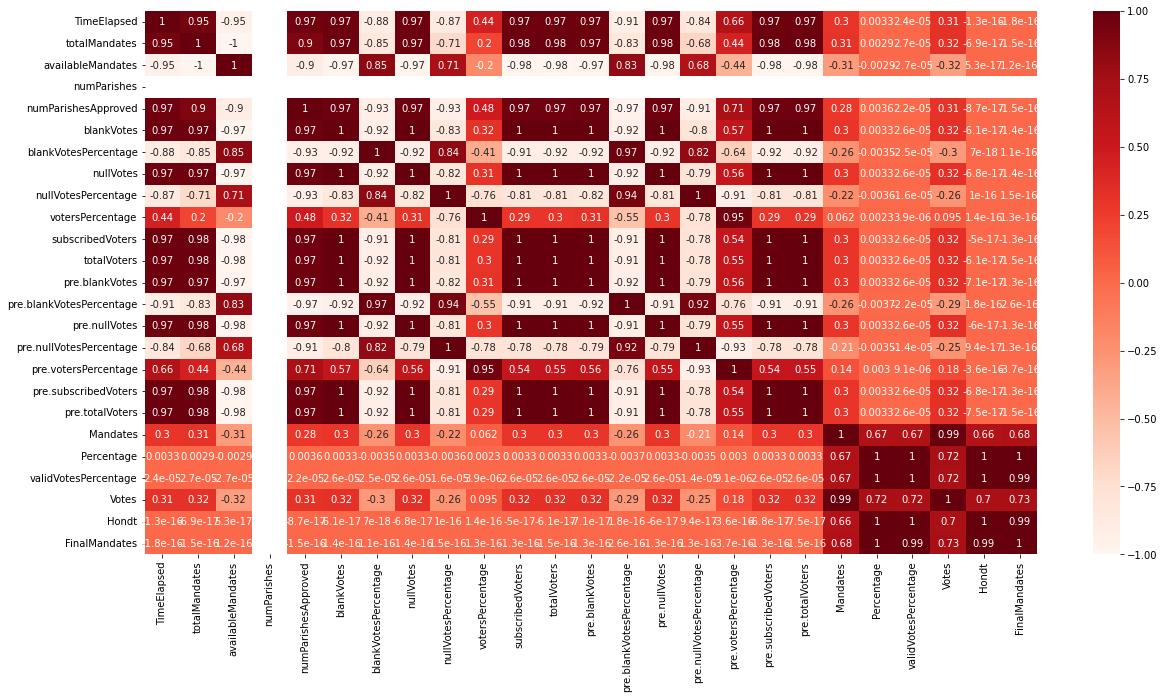

In [11]:
f, ax = plt.subplots(figsize=(20,10))
corr_analysis = sns.heatmap(data=corr_all, 
           annot=True,
           annot_kws=None,
           cmap="Reds")
plt.show()
fig = corr_analysis.get_figure()
fig.savefig("fig_corr_analysis.png") 

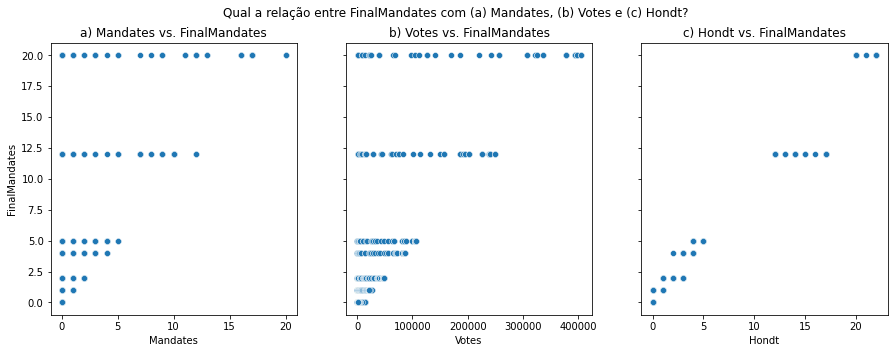

In [12]:
#É observado na no heatmap que o FinalMandates tem alta correlacao com 
#(a) Mandates, (b) Percentage, (c) validVotesPercentage, (d)Votes e (e) Hondt. 
# Qual a relação entre Mandates com o FinalMandates?
#define dimensions of subplots (rows, columns)

fig, axes = plt.subplots(1,3, figsize=(15,5), sharey=True)
FinalMandates = fig.suptitle('Qual a relação entre FinalMandates com (a) Mandates, (b) Votes e (c) Hondt?')
axes[0].set_title('a) Mandates vs. FinalMandates')
sns.scatterplot(ax=axes[0], x=df_lisboa['Mandates'], y=df_lisboa['FinalMandates'])

axes[1].set_title('b) Votes vs. FinalMandates')
sns.scatterplot(ax=axes[1], x=df_lisboa['Votes'], y=df_lisboa['FinalMandates'])

axes[2].set_title('c) Hondt vs. FinalMandates')
sns.scatterplot(ax=axes[2], x=df_lisboa['Hondt'], y=df_lisboa['FinalMandates'])
plt.show()

fig = FinalMandates.get_figure()
fig.savefig("fig_finalmandates.png") 

<AxesSubplot:title={'center':'b) Votes vs. FinalMandates'}, xlabel='validVotesPercentage', ylabel='FinalMandates'>

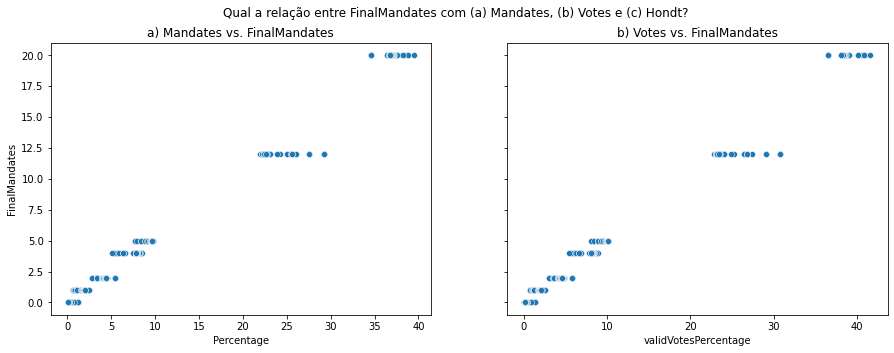

In [13]:
#É observado na no heatmap que o FinalMandates tem alta correlacao com 
#(a) Mandates, (b) Percentage, (c) validVotesPercentage, (d)Votes e (e) Hondt. 
# Qual a relação entre Mandates com o FinalMandates?
#define dimensions of subplots (rows, columns)

fig, axes = plt.subplots(1,2, figsize=(15,5), sharey=True)
FinalMandates = fig.suptitle('Qual a relação entre FinalMandates com (a) Mandates, (b) Votes e (c) Hondt?')
axes[0].set_title('a) Mandates vs. FinalMandates')
sns.scatterplot(ax=axes[0], x=df_lisboa['Percentage'], y=df_lisboa['FinalMandates'])

axes[1].set_title('b) Votes vs. FinalMandates')
sns.scatterplot(ax=axes[1], x=df_lisboa['validVotesPercentage'], y=df_lisboa['FinalMandates'])


In [14]:
df_lisboa['time'] = pd.to_datetime(df_lisboa['time']).astype(int) / 10**9
df_lisboa['time']

213      1.570393e+09
214      1.570393e+09
215      1.570393e+09
216      1.570393e+09
217      1.570393e+09
             ...     
21485    1.570409e+09
21486    1.570409e+09
21487    1.570409e+09
21488    1.570409e+09
21489    1.570409e+09
Name: time, Length: 1080, dtype: float64

In [15]:
#Limpando o dataframe, considerando a correlacao >0,9
df_lisboa = df_lisboa.drop(columns=['territoryName', 'numParishes'])
df_lisboa.shape
df_lisboa.dtypes

TimeElapsed                   int64
time                        float64
totalMandates                 int64
availableMandates             int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                        object
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates                 int64
dtype: object

In [16]:
def preprocess_time(df):
    """ This function convert time column from object to datetime format."""
    
    # Convert time column 
    df['time'] = pd.to_datetime(df['time']).astype(int)
    
    return df

In [17]:
#testing preprocess_time

df_lisboa = preprocess_time(catalog.load('lisboa_dataset'))
df_lisboa.head()

2022-06-30 23:13:14,964 - kedro.io.data_catalog - INFO - Loading data from `lisboa_dataset` (CSVDataSet)...


,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,1570392602000000000,Lisboa,0,48,134,6,127,2.78,114,2.49,55.33,8265,4573,119,2.43,104,2.12,58.24,8414,4900,PS,0,34.64,36.57,1584,20,20
1,0,1570392602000000000,Lisboa,0,48,134,6,127,2.78,114,2.49,55.33,8265,4573,119,2.43,104,2.12,58.24,8414,4900,PPD/PSD,0,29.19,30.82,1335,17,12
2,0,1570392602000000000,Lisboa,0,48,134,6,127,2.78,114,2.49,55.33,8265,4573,119,2.43,104,2.12,58.24,8414,4900,B.E.,0,7.78,8.22,356,4,5
3,0,1570392602000000000,Lisboa,0,48,134,6,127,2.78,114,2.49,55.33,8265,4573,119,2.43,104,2.12,58.24,8414,4900,PCP-PEV,0,5.69,6.00,260,3,4
4,0,1570392602000000000,Lisboa,0,48,134,6,127,2.78,114,2.49,55.33,8265,4573,119,2.43,104,2.12,58.24,8414,4900,CDS-PP,0,5.49,5.79,251,3,2


In [18]:
def func_drop_columns(df):
    """ This function clears the dataframe. Study performed from the heatmap, considering correlation > 0.9 """    
   
    #Remove columns with correlation less than 0.9
    df = df.drop(columns=['territoryName', 'numParishes'])
    
    return df

In [19]:
#test func_drop_columns

df_lisboa = func_drop_columns(catalog.load('pp_election_time_correction'))
df_lisboa.head()

2022-06-30 23:13:14,988 - kedro.io.data_catalog - INFO - Loading data from `pp_election_time_correction` (CSVDataSet)...


,TimeElapsed,time,totalMandates,availableMandates,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,1570392602000000000,0,48,6,127,2.78,114,2.49,55.33,8265,4573,119,2.43,104,2.12,58.24,8414,4900,PS,0,34.64,36.57,1584,20,20
1,0,1570392602000000000,0,48,6,127,2.78,114,2.49,55.33,8265,4573,119,2.43,104,2.12,58.24,8414,4900,PPD/PSD,0,29.19,30.82,1335,17,12
2,0,1570392602000000000,0,48,6,127,2.78,114,2.49,55.33,8265,4573,119,2.43,104,2.12,58.24,8414,4900,B.E.,0,7.78,8.22,356,4,5
3,0,1570392602000000000,0,48,6,127,2.78,114,2.49,55.33,8265,4573,119,2.43,104,2.12,58.24,8414,4900,PCP-PEV,0,5.69,6.00,260,3,4
4,0,1570392602000000000,0,48,6,127,2.78,114,2.49,55.33,8265,4573,119,2.43,104,2.12,58.24,8414,4900,CDS-PP,0,5.49,5.79,251,3,2


In [20]:
df_lisboa.dtypes

TimeElapsed                   int64
time                          int64
totalMandates                 int64
availableMandates             int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                        object
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates                 int64
dtype: object

In [21]:
#transformando a coluna Party que é categoria de texto em categorias de numero 

from sklearn.preprocessing import LabelEncoder
label_encoder_party = LabelEncoder()
label_encoder_party
label_encoder_party = label_encoder_party.fit(df_lisboa['Party'])

In [22]:
df_lisboa['Party'] = label_encoder_party.transform(df_lisboa['Party'])

In [23]:
label_encoder_party.inverse_transform(df_lisboa['Party'])

array(['PS', 'PPD/PSD', 'B.E.', ..., 'PDR', 'MAS', 'PTP'], dtype=object)

In [24]:
def enconde_party(df):
    
    """This function converts the Party column to numeric categories"""

    label_encoder_party = LabelEncoder()
    label_encoder_party = label_encoder_party.fit(df['Party'])
    df['Party'] = label_encoder_party.transform(df['Party'])

    return df, label_encoder_party

In [25]:
#testing enconde_party

df_lisboa_encoded = enconde_party(catalog.load('pp_election'))
df_lisboa_encoded

2022-06-30 23:13:15,034 - kedro.io.data_catalog - INFO - Loading data from `pp_election` (CSVDataSet)...


(      TimeElapsed                 time  totalMandates  availableMandates  \
 0               0  1570392602000000000              0                 48   
 1               0  1570392602000000000              0                 48   
 2               0  1570392602000000000              0                 48   
 3               0  1570392602000000000              0                 48   
 4               0  1570392602000000000              0                 48   
 ...           ...                  ...            ...                ...   
 1075          265  1570408501000000000             48                  0   
 1076          265  1570408501000000000             48                  0   
 1077          265  1570408501000000000             48                  0   
 1078          265  1570408501000000000             48                  0   
 1079          265  1570408501000000000             48                  0   
 
       numParishesApproved  blankVotes  blankVotesPercentage  nullVotes  \

In [26]:
df_lisboa.dtypes

TimeElapsed                   int64
time                          int64
totalMandates                 int64
availableMandates             int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                         int64
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates                 int64
dtype: object

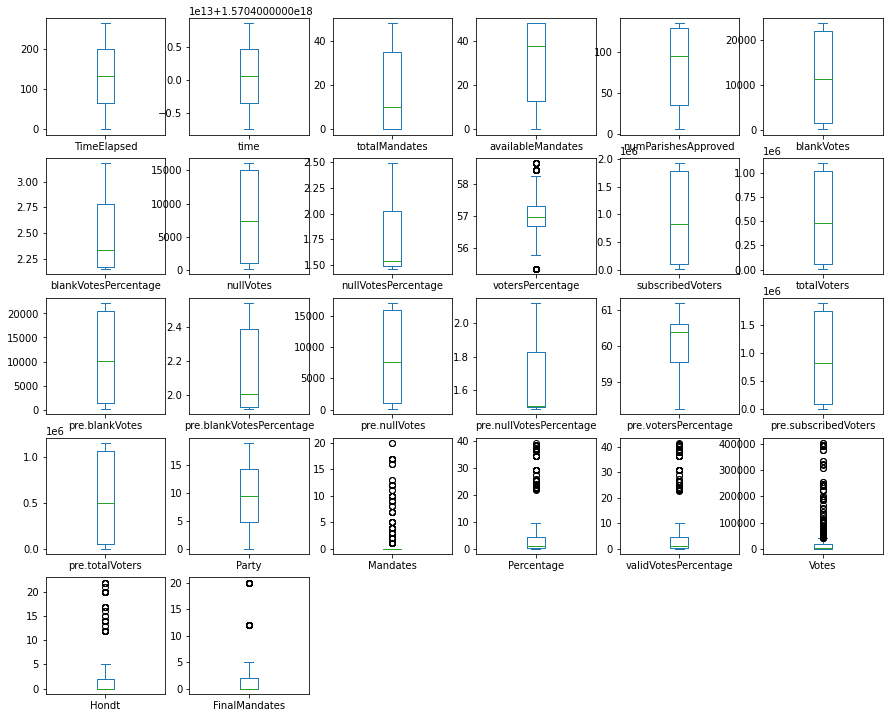

In [27]:
#Now we will check for outliers using boxplot

fig = df_lisboa.plot(kind="box",subplots=True,layout=(6,6),figsize=(15,15))

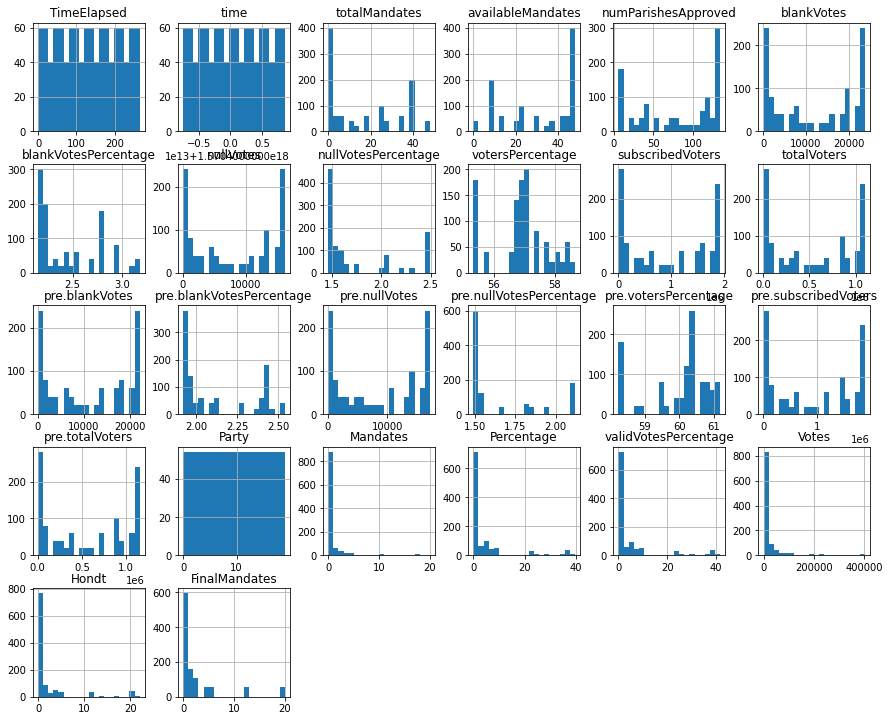

In [28]:
#Now plotting histogram for checking distribution of variables
fig2 = df_lisboa.hist(figsize=(15,15), layout=(6,6), bins=20)

In [29]:
#Removal of Outliers
#REF: https://www.askpython.com/python/examples/detection-removal-outliers-in-python

for x in df_lisboa:
    q75,q25 = np.percentile(df_lisboa.loc[:,x],[75,25])
    intr_qr = q75-q25
    
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_lisboa.loc[df_lisboa[x] < min,x] = np.nan
    df_lisboa.loc[df_lisboa[x] > max,x] = np.nan
        
y = df_lisboa.dropna(axis = 0)
y

,TimeElapsed,time,totalMandates,availableMandates,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
182,45.0,1.570395e+18,0.0,48.0,23.0,667.0,3.15,487.0,2.30,55.77,37946.0,21163.0,575.0,2.54,443.0,1.95,58.76,38571.0,22665.0,1.0,0.0,7.85,8.30,1661.0,4.0,5.0
183,45.0,1.570395e+18,0.0,48.0,23.0,667.0,3.15,487.0,2.30,55.77,37946.0,21163.0,575.0,2.54,443.0,1.95,58.76,38571.0,22665.0,10.0,0.0,5.34,5.65,1130.0,3.0,4.0
184,45.0,1.570395e+18,0.0,48.0,23.0,667.0,3.15,487.0,2.30,55.77,37946.0,21163.0,575.0,2.54,443.0,1.95,58.76,38571.0,22665.0,2.0,0.0,4.31,4.56,913.0,2.0,2.0
185,45.0,1.570395e+18,0.0,48.0,23.0,667.0,3.15,487.0,2.30,55.77,37946.0,21163.0,575.0,2.54,443.0,1.95,58.76,38571.0,22665.0,9.0,0.0,2.89,3.06,612.0,1.0,2.0
186,45.0,1.570395e+18,0.0,48.0,23.0,667.0,3.15,487.0,2.30,55.77,37946.0,21163.0,575.0,2.54,443.0,1.95,58.76,38571.0,22665.0,3.0,0.0,2.10,2.22,444.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,265.0,1.570409e+18,48.0,0.0,134.0,23702.0,2.15,16081.0,1.46,57.33,1921047.0,1101346.0,22176.0,1.92,17112.0,1.49,60.60,1900982.0,1152050.0,18.0,0.0,0.19,0.20,2101.0,0.0,0.0
1076,265.0,1.570409e+18,48.0,0.0,134.0,23702.0,2.15,16081.0,1.46,57.33,1921047.0,1101346.0,22176.0,1.92,17112.0,1.49,60.60,1900982.0,1152050.0,15.0,0.0,0.18,0.18,1958.0,0.0,0.0
1077,265.0,1.570409e+18,48.0,0.0,134.0,23702.0,2.15,16081.0,1.46,57.33,1921047.0,1101346.0,22176.0,1.92,17112.0,1.49,60.60,1900982.0,1152050.0,12.0,0.0,0.17,0.18,1884.0,0.0,0.0
1078,265.0,1.570409e+18,48.0,0.0,134.0,23702.0,2.15,16081.0,1.46,57.33,1921047.0,1101346.0,22176.0,1.92,17112.0,1.49,60.60,1900982.0,1152050.0,6.0,0.0,0.11,0.12,1236.0,0.0,0.0


In [37]:
#funcao remover outliers com IQR approach

def func_remove_outliers_IQR_approach(df):
    
    """ This function detects and removes outliers using the IQR_approach """
    
    for x in df:
        q75,q25 = np.percentile(df.loc[:,x],[75,25])
        intr_qr = q75-q25

        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)

        df.loc[df[x] < min,x] = np.nan
        df.loc[df[x] > max,x] = np.nan

    df = df.dropna(axis = 0)
    
    return df

In [38]:
#testando func_remove_outliers_zscore

df_lisboa2 = func_remove_outliers_IQR_approach(catalog.load('encode_party_dataset'))
df_lisboa2

2022-06-30 23:13:54,830 - kedro.io.data_catalog - INFO - Loading data from `encode_party_dataset` (CSVDataSet)...


,TimeElapsed,time,totalMandates,availableMandates,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
182,45.0,1.570395e+18,0.0,48.0,23.0,667.0,3.15,487.0,2.30,55.77,37946.0,21163.0,575.0,2.54,443.0,1.95,58.76,38571.0,22665.0,1.0,0.0,7.85,8.30,1661.0,4.0,5.0
183,45.0,1.570395e+18,0.0,48.0,23.0,667.0,3.15,487.0,2.30,55.77,37946.0,21163.0,575.0,2.54,443.0,1.95,58.76,38571.0,22665.0,10.0,0.0,5.34,5.65,1130.0,3.0,4.0
184,45.0,1.570395e+18,0.0,48.0,23.0,667.0,3.15,487.0,2.30,55.77,37946.0,21163.0,575.0,2.54,443.0,1.95,58.76,38571.0,22665.0,2.0,0.0,4.31,4.56,913.0,2.0,2.0
185,45.0,1.570395e+18,0.0,48.0,23.0,667.0,3.15,487.0,2.30,55.77,37946.0,21163.0,575.0,2.54,443.0,1.95,58.76,38571.0,22665.0,9.0,0.0,2.89,3.06,612.0,1.0,2.0
186,45.0,1.570395e+18,0.0,48.0,23.0,667.0,3.15,487.0,2.30,55.77,37946.0,21163.0,575.0,2.54,443.0,1.95,58.76,38571.0,22665.0,3.0,0.0,2.10,2.22,444.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,265.0,1.570409e+18,48.0,0.0,134.0,23702.0,2.15,16081.0,1.46,57.33,1921047.0,1101346.0,22176.0,1.92,17112.0,1.49,60.60,1900982.0,1152050.0,18.0,0.0,0.19,0.20,2101.0,0.0,0.0
1076,265.0,1.570409e+18,48.0,0.0,134.0,23702.0,2.15,16081.0,1.46,57.33,1921047.0,1101346.0,22176.0,1.92,17112.0,1.49,60.60,1900982.0,1152050.0,15.0,0.0,0.18,0.18,1958.0,0.0,0.0
1077,265.0,1.570409e+18,48.0,0.0,134.0,23702.0,2.15,16081.0,1.46,57.33,1921047.0,1101346.0,22176.0,1.92,17112.0,1.49,60.60,1900982.0,1152050.0,12.0,0.0,0.17,0.18,1884.0,0.0,0.0
1078,265.0,1.570409e+18,48.0,0.0,134.0,23702.0,2.15,16081.0,1.46,57.33,1921047.0,1101346.0,22176.0,1.92,17112.0,1.49,60.60,1900982.0,1152050.0,6.0,0.0,0.11,0.12,1236.0,0.0,0.0


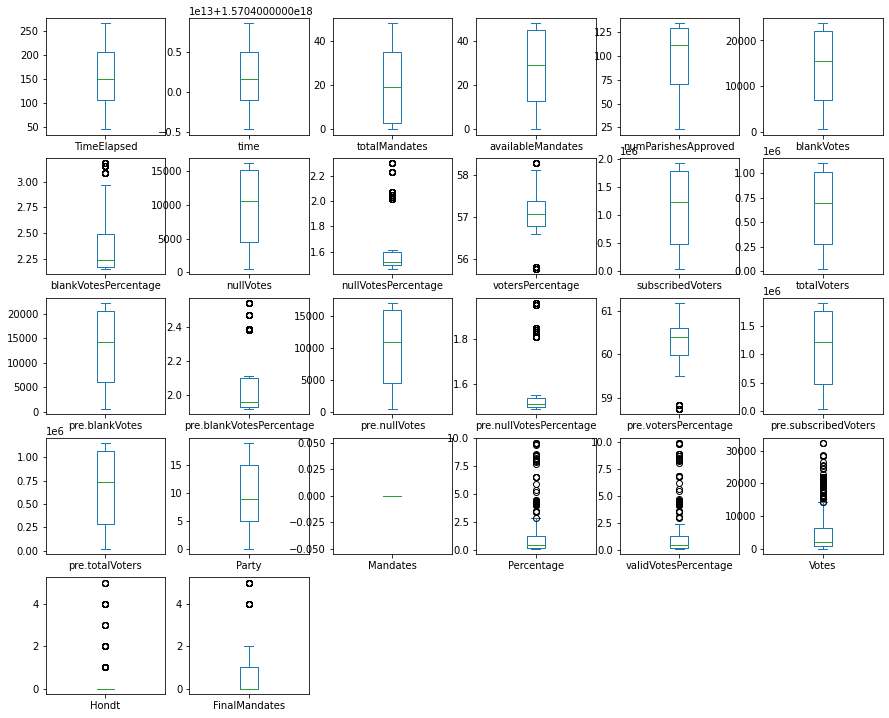

In [39]:
fig2 = df_lisboa2.plot(kind="box",subplots=True,layout=(6,6),figsize=(15,15))

In [33]:
#MODELO
#SEM FUNCAO

df_lisboa

# Create dependent variables
X = df_lisboa.drop(columns=['FinalMandates'])
y = df_lisboa['FinalMandates']

# Slipt data 
X_train, X_test, y_train, y_test = train_test_split(
df_lisboa, y, test_size = 0.3, random_state = 9999, stratify = y
)
    

regression = GradientBoostingRegressor()
regression.fit(X_train, y_train)
    
#Predicts test set 
y_pred_lisboa = regression.predict(X_test)
    
#Reports Score
print('MAE:',mean_absolute_error(y_test,y_pred_lisboa))
print('MSE:',mean_squared_error(y_test,y_pred_lisboa))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred_lisboa)))
print('R2 score:',r2_score(y_test,y_pred_lisboa))



MAE: 1.82019072416751e-05
MSE: 7.435655375725795e-10
RMSE: 2.7268398148270088e-05
R2 score: 0.9999999992942683


In [60]:
def func_split_data(df, test_size = 0.3, random_state = 9999):
    
    """Splits data into train and test datasets"""
    
    # Create dependent variables
    X = df.drop(columns=['FinalMandates'])
    y = df['FinalMandates']

    # Slipt data 
    X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size = test_size, random_state = random_state, stratify = y
    )
    
    return X_train, X_test, y_train, y_test


In [61]:
#testing func_split_data

X_train, X_test, y_train, y_test = func_split_data(catalog.load('election_without_outliers_dataset'), test_size = 0.3, random_state = 9999)

2022-06-30 23:27:35,810 - kedro.io.data_catalog - INFO - Loading data from `election_without_outliers_dataset` (CSVDataSet)...


In [62]:
def func_fit_model(X_train, X_test, y_train, y_test):
    
    """Fits a classifier model using a training dataset"""
    
    regression = GradientBoostingRegressor()
    regression.fit(X_train, y_train)
    
    #Predicts test set 
    y_pred = regression.predict(X_test)
    
    #Reports Score
    print('MAE:',mean_absolute_error(y_test,y_pred))
    print('MSE:',mean_squared_error(y_test,y_pred))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('R2 score:',r2_score(y_test,y_pred))
    
    df_final_predict = pd.DataFrame({'TestValues': y_test, 'PredictedValues': y_pred})
    df_final_predict
    
    return regression, df_final_predict

In [63]:
#testing func_split_data
regression_model = func_fit_model(X_train, X_test, y_train, y_test)

MAE: 1.820190724167433e-05
MSE: 7.435655375725609e-10
RMSE: 2.7268398148269745e-05
R2 score: 0.9999999992942683


In [67]:
def func_predict(X_test, y_test, model_regression):
    #Predicts test set 
    y_pred = regression.predict(X_test)
    df_final_predict = pd.DataFrame({'TestValues': y_test, 'PredictedValues': y_pred})
    
    return df_final_predict

In [68]:
#testando func_predict

prediction = func_predict(X_test, y_test, regression) 

In [34]:
resultado_final_lisboa = pd.DataFrame({'TestValues': y_test, 'PredictedValues': y_pred_lisboa})
resultado_final_lisboa

,TestValues,PredictedValues
249,0.0,0.000012
270,0.0,0.000012
429,0.0,0.000012
1008,1.0,0.999986
508,1.0,0.999986
...,...,...
756,0.0,0.000012
402,5.0,4.999879
312,0.0,0.000012
183,4.0,3.999906


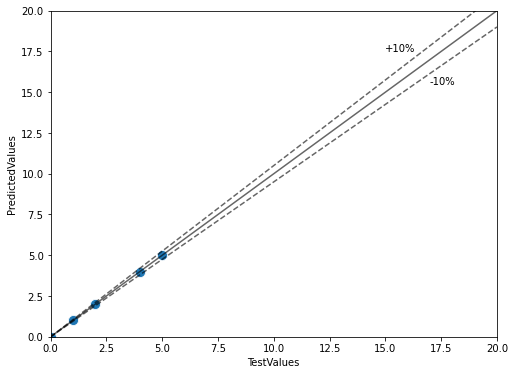

In [35]:
fig, ax = plt.subplots(figsize=(8, 6))

x1=[0,20]
y1=x1
y2=[0,21]
y3=[0,19]
sns.scatterplot(x=resultado_final_lisboa['TestValues'], y=resultado_final_lisboa['PredictedValues'], s=100)
sns.lineplot(x=x1, y=y1, color='black', linestyle='-', alpha=0.6)
sns.lineplot(x=x1, y=y2, color='black', linestyle='--', alpha=0.6)
sns.lineplot(x=x1, y=y3, color='black', linestyle='--', alpha=0.6)

ax.text(15, 17.5, "+10%")
ax.text(17, 15.5, "-10%")

plt.xlim(0,20)
plt.ylim(0,20)
plt.show() 

<AxesSubplot:xlabel='TestValues', ylabel='PredictedValues'>

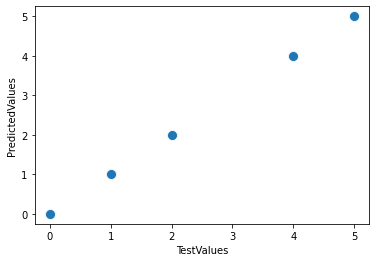

In [36]:
sns.scatterplot(x=resultado_final_lisboa['TestValues'], y=resultado_final_lisboa['PredictedValues'], s=100)

